In [5]:
import pandas as pd
df = pd.read_csv('house_price_dataset.csv')
df1 = pd.read_csv('house_price_noisy_missing_outliers.csv')

missing_count = df1.isna().sum()
print("Missing values per column:")
print(missing_count)

missing_percent = (df1.isna().mean() * 100).round(2)
print("\nMissing percentage per column:")
print(missing_percent)

rows_with_missing = df1[df1.isna().any(axis=1)]
print("\nRows with at least one missing value:", len(rows_with_missing))


rows_with_missing.head(10)


Missing values per column:
Area_sqft              200
Bedrooms               200
Bathrooms              200
Age_years              200
Distance_to_City_km    200
Price_Lakhs            200
dtype: int64

Missing percentage per column:
Area_sqft              20.0
Bedrooms               20.0
Bathrooms              20.0
Age_years              20.0
Distance_to_City_km    20.0
Price_Lakhs            20.0
dtype: float64

Rows with at least one missing value: 719


,Area_sqft,Bedrooms,Bathrooms,Age_years,Distance_to_City_km,Price_Lakhs
0,3724.771767,1.0,2.0,32.0,NaN,137.109374
3,746.852643,NaN,2.0,26.0,24.841896,9.655593
4,NaN,4.0,1.0,8.0,39.731176,27.740274
5,2325.718269,1.0,3.0,4.0,34.723841,NaN
8,NaN,1.0,3.0,30.0,16.939000,244.464720
9,NaN,3.0,3.0,45.0,30.588481,18.450279
10,NaN,4.0,3.0,42.0,1.067194,176.090560
13,1180.549002,5.0,3.0,2.0,NaN,46.692580
15,1282.824362,5.0,1.0,NaN,NaN,28.828375
17,2593.393044,2.0,3.0,3.0,NaN,NaN


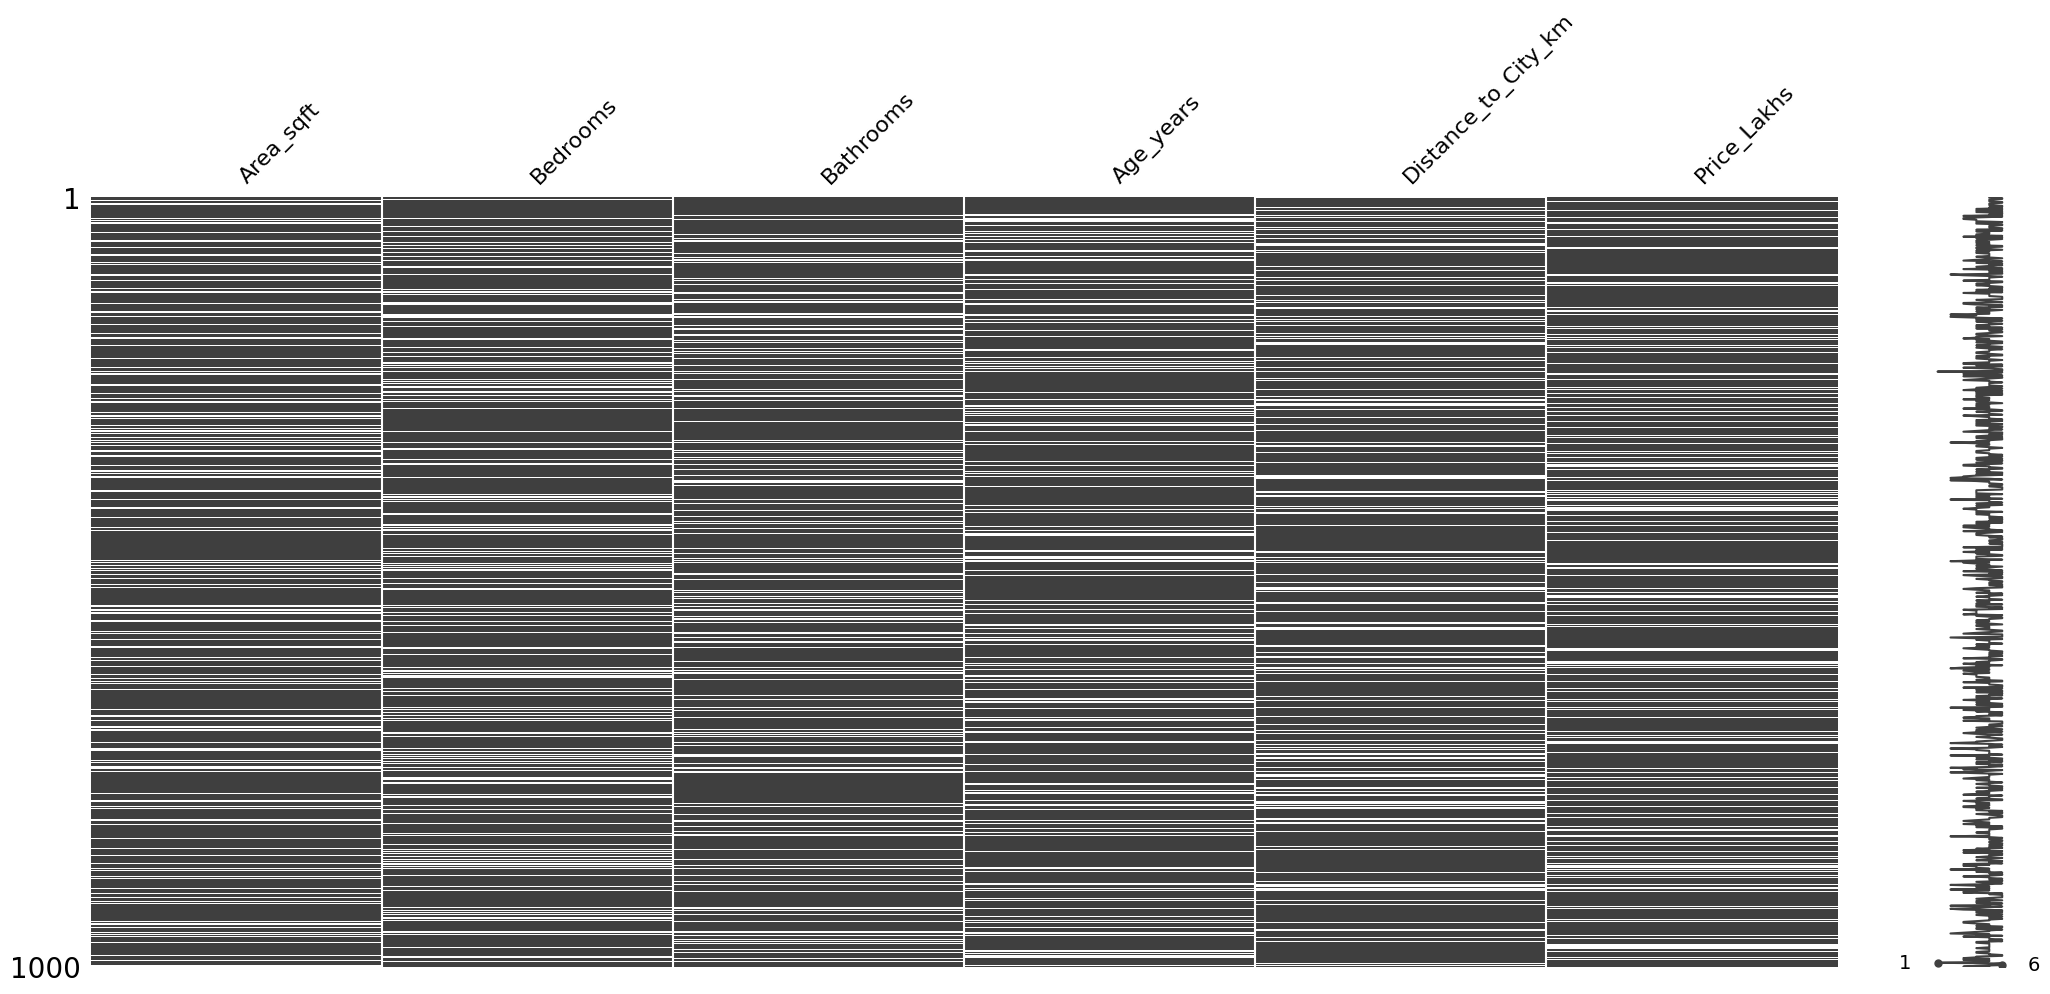

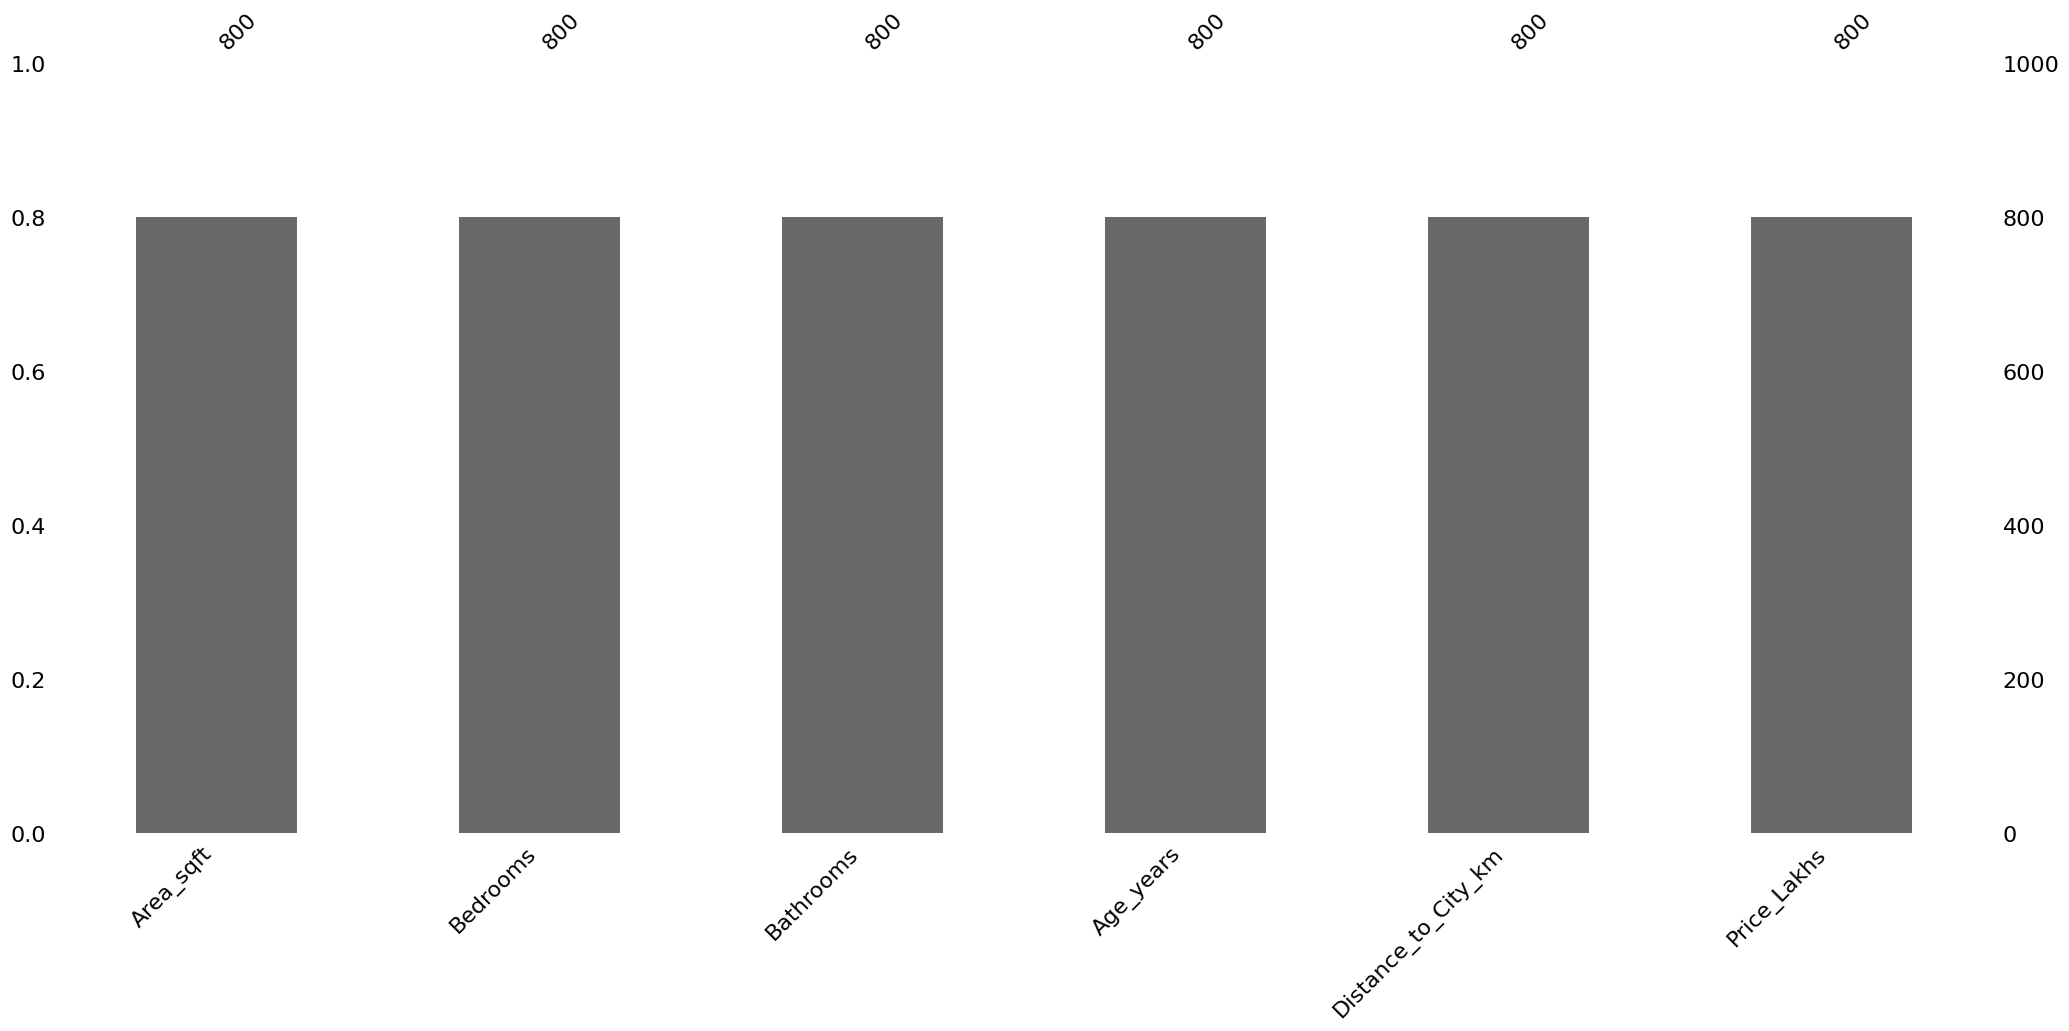

In [14]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df1)
plt.show()

msno.bar(df1)
plt.show()

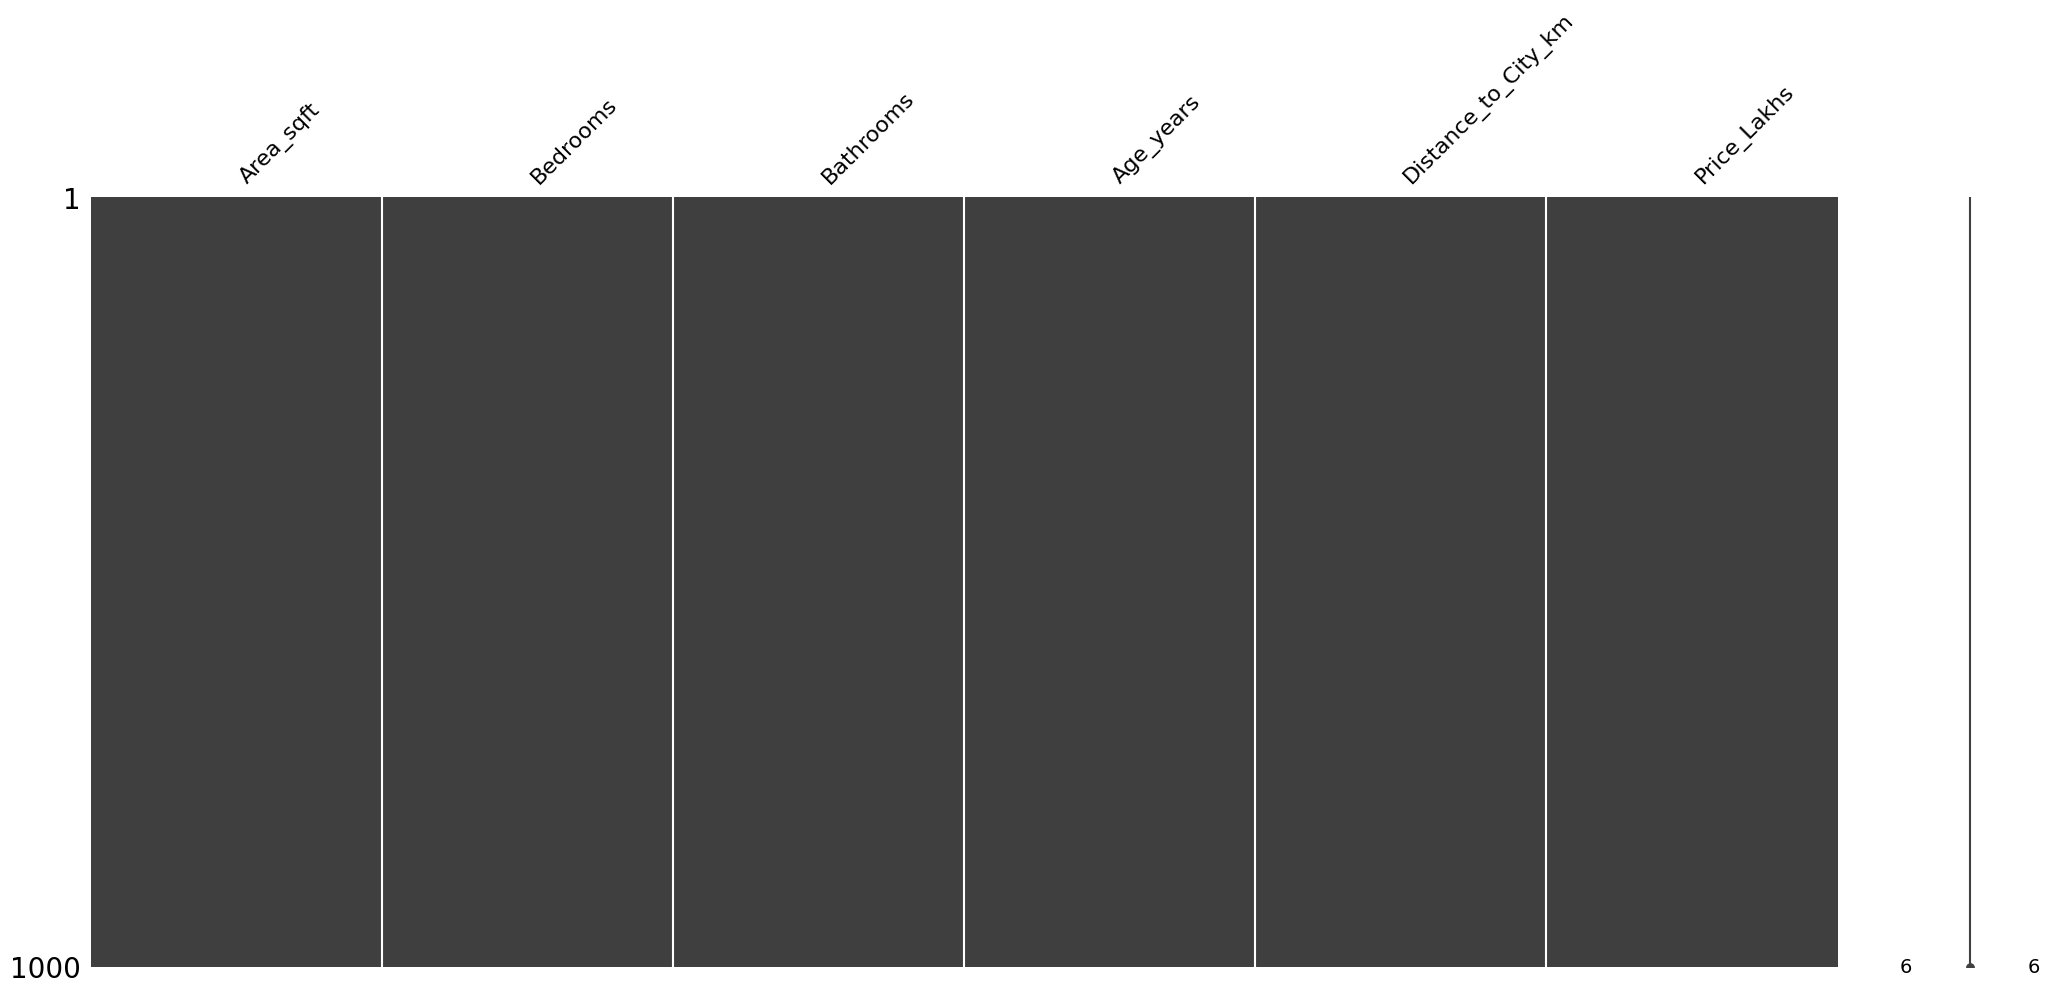

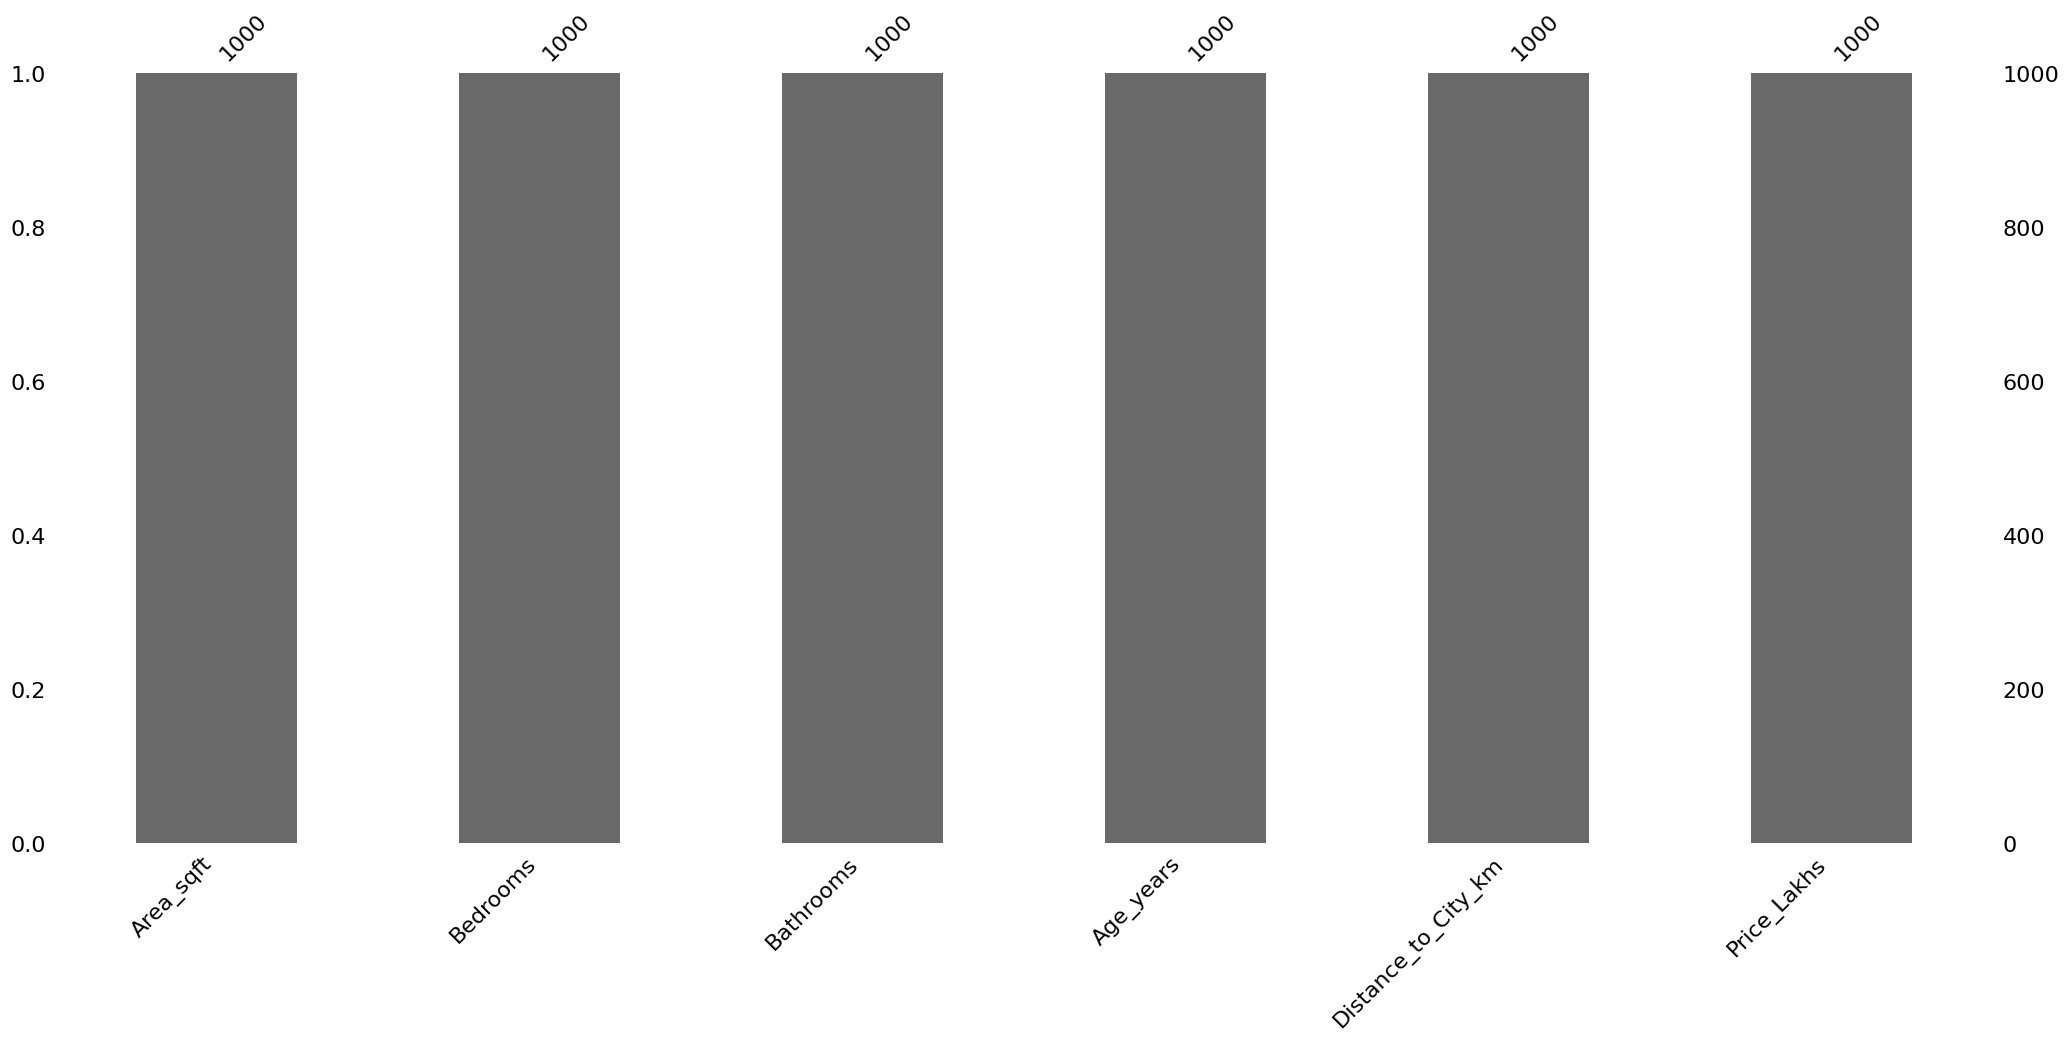

In [15]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

In [7]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="mean")
X_filled = imp.fit_transform(df1)

# print(X_filled.isna().sum())

print(X_filled)

df_filled = pd.DataFrame(X_filled,
                         columns=df1.columns,
                         index = df1.index)
print(df_filled.isna().sum())


[[3.72477177e+03 1.00000000e+00 2.00000000e+00 3.20000000e+01
  2.02385383e+01 1.37109374e+02]
 [1.99867272e+03 2.00000000e+00 3.00000000e+00 3.40000000e+01
  2.02415479e+01 1.41962623e+02]
 [1.64148925e+03 4.00000000e+00 1.00000000e+00 3.80000000e+01
  1.56308127e+01 7.30529304e+01]
 ...
 [1.04533649e+03 2.97750000e+00 2.06375000e+00 2.70000000e+01
  2.40945950e+01 2.89087742e+01]
 [1.61922253e+03 4.00000000e+00 1.00000000e+00 2.47325000e+01
  2.02385383e+01 1.21952033e+02]
 [1.61922253e+03 4.00000000e+00 1.00000000e+00 3.20000000e+01
  1.80082236e+01 8.27147282e+01]]
Area_sqft              0
Bedrooms               0
Bathrooms              0
Age_years              0
Distance_to_City_km    0
Price_Lakhs            0
dtype: int64


In [13]:
import pandas as pd
df = pd.read_csv('house_price_dataset.csv')
X = df.drop("Price_Lakhs", axis=1)
y = df["Price_Lakhs"]

from sklearn.model_selection import train_test_split

# Step 1: Train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Training (80%) and Validation (20%) from test
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


# print(df.columns)